In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os, glob
import string
import random
import re
import warnings
warnings.filterwarnings('ignore')

In [41]:
#get all english words from built-in dictionary
file = open("/usr/share/dict/words", "r")
#cleaning file to simple list
all_words_df = re.sub("[^\w]", " ",  file.read()).split()
file.close()

In [42]:
all_word=[] #make a list of only 5 letters words
for x in all_words_df:
    if len(x) ==5:
        all_word.append(x.lower())

In [43]:
#list of alphabet characters
alfabet =list(string.ascii_lowercase)

In [44]:
# source:https://www.kaggle.com/datasets/rtatman/english-word-frequency
#frequency of english words
df_freq =pd.read_csv('unigram_freq.csv')
#adding length
df_freq['len'] =df_freq.apply(lambda x: len(str(x['word'])),axis =1)
#finding 5 characters, and selecting only top 2000 (as rest is a bit of mess/unusual words
fives_freq =df_freq[df_freq['len']==5]
fives_freq= fives_freq.head(2000)


In [45]:
# out of 2000 most popular english word with 5 characters, find those which are in dictionary
# (making sure to filter out slang)
words= fives_freq[fives_freq['word'].isin(all_word)]

In [17]:
# for those selected, make a count for every letter ('dikt')
all_letters =''.join(list(words['word']))
dikt ={}
for l in alfabet:
    dikt[l]=all_letters.count(l)
    

In [22]:
#popularity of letters inside selected population
popularity =pd.DataFrame.from_dict(dikt,orient='index').reset_index()
popularity.rename(columns = {'index':'letter',0:'count'}, inplace = True)
popularity.sort_values(by='count', ascending= False, inplace = True)

<BarContainer object of 26 artists>

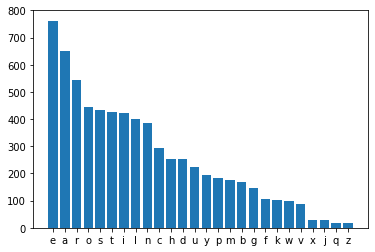

In [23]:
#simple visual representation
plt.bar(popularity['letter'],popularity['count'])

In [24]:
#select ten most popular letters
most_pop =list(popularity['letter'].head(10))

In [52]:
#create matrix of popular words and how often top 10 letters appears overthere
blacklist=['word','len','count','total_unique']
def count_letters (df,most_pop):
    for l in most_pop:
        df[l]=df.apply((lambda x: x['word'].count(l)),axis =1)
    cols = [col for col in df.columns if col not in blacklist]
    df['total_unique'] = len(cols) - (df == 0).astype(int).sum(axis=1) 
    df.sort_values(by=['total_unique'], inplace=True, ascending =False)
    return df

In [65]:
#creating dataframe (words_n_popularity) and list (data)
#which contains the most popular words with biggest number of most popular letters
words_n_popularity = count_letters(words,most_pop).head(1000)
data= list(words_n_popularity['word'])
words_n_popularity.head(5)

,word,count,len,e,a,r,o,s,t,i,l,n,c,total_unique
8333,satin,6620674,5,0,1,0,0,1,1,1,0,1,0,5
13308,roast,3205415,5,0,1,1,1,1,1,0,0,0,0,5
12165,clare,3687106,5,1,1,1,0,0,0,0,1,0,1,5
9458,lance,5509634,5,1,1,0,0,0,0,0,1,1,1,5
2449,alert,32472727,5,1,1,1,0,0,1,0,1,0,0,5


In [66]:
#find list of words to start
def start_words(l, pop =most_pop): #l - list of words, n - how many words, pop - list of popular words
    while True:
        while True:
            first =random.choice(data)
            first_overlap =list((set.intersection(set(first), set(pop))))
            if len(first_overlap) ==5:
                break
                
        while True: 
            second =random.choice(data)
            second_overlap =list((set.intersection(set(second), set(pop))))
            first_second_overlap =list((set.intersection(set(first), set(second))))
            if len(second_overlap) >=5 and len(first_second_overlap) <=1:
                break
         
            same_place = sum(x == y for x,y in zip(first,second))
            if same_place <=1:
                break

        third =random.choice(data)
        all_three = set(list(first+second+third))
        if len(all_three) >= 14: #tu dodac jakis warunek ze jak sie sypie to lec od poacztku? 
            break
            
    all_overlap= len((set.intersection(all_three, set(pop))))
    total_unique =len(all_three)
        
    while True:
        fourth =random.choice(data)
        all_four = set(list(first+second+third+fourth))
        if len(all_four) >= 16: 
            break
    
        
    #return first,second,same_place,third, fourth
    return print(first,
                 second,
                 third,
                     '\n number of unique letters: {}\n'.format(total_unique),
                     'optional, if still bad:\n',fourth,
                     '\n number of unique letters with fourth:{}\n'.format(len(all_four)))
                        

In [67]:
#functions to find proper words with data obtained by start_words
def finder(word,data,outs, ins):
    
    words = list(map(list,data))
    
    def find_words(word,data):
        result=[]
        known = 5 - word.count('0')
        if known != 0:
            for w in data:
                found=0
                i=0
                for l in word:
                    if l in w[i]:
                          found+=1
                    i+=1
                if known == found:
                    result.append(w)       
        return result
    
    def notmatchy(outs,data = data):
        outs =list(outs)
        not_matchy_words=set()
        for w in data:
            for l in outs:
                if l  in w:
                    not_matchy_words.add(w)
        return not_matchy_words
    
    def matchy(ins,data = data):
        ins =list(ins)
        matchy_words=set()
        for w in data:
            found =set()
            for l in ins:
                if l  in w:
                    found.add(l)
            if len(ins)==len(found):
                matchy_words.add(w)  
        return matchy_words
    
    results = find_words(word,data)
    not_matchy_words = notmatchy(outs,data)
    matchy_word = matchy(ins,data)
    
    result = list(set(results) - set(not_matchy_words))
    result = list((set.intersection(set(result), set(matchy_word))))
    if word=='00000':
            result =list(set(matchy_word) - set(not_matchy_words)) 
    return result



In [73]:
# lets print couple of starting words
i=0
while i <5:
    i+=1
    print(start_words(data))

coast lunch mixer 
 number of unique letters: 14
 optional, if still bad:
 drink 
 number of unique letters with fourth:16

None
scent vapor julia 
 number of unique letters: 14
 optional, if still bad:
 ridge 
 number of unique letters with fourth:16

None
coral setup singh 
 number of unique letters: 14
 optional, if still bad:
 boxer 
 number of unique letters with fourth:16

None
coast fiber dylan 
 number of unique letters: 14
 optional, if still bad:
 guilt 
 number of unique letters with fourth:16

None
stain block grove 
 number of unique letters: 14
 optional, if still bad:
 prism 
 number of unique letters with fourth:16

None


In [74]:
word ='00000' #this is your world. if you know a letter, replace 0 with it
ins ='' #here letters which you know are in the word (but position not know)
outs='' #here letters which you know are in the word
finder(word,all_word,outs,ins)